# Class Single Recording Code

Developing Code for Single Recordings
- Filtering
- Whole Trace Observations
- Epoch Extraction
- PSTHS

In [1]:
import tdt
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from single_tdt_class import *
# from hab_dishab_extension import *

In [2]:
single_recording_path = r"C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined\Hab_Dishab\nac\n5-240821-085040"
csv_base_path = r"C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined\Hab_Dishab\nac_csvs\n5-240821-085040.csv"

## Bout Data from CSV

In [3]:
tdt_data = tdt.read_block(single_recording_path)
# Assuming `tdt_data` is already loaded
tdt_data_obj = TDTData(tdt_data, single_recording_path)

tdt_data_obj.extract_manual_annotation_behaviors(csv_base_path)

# Remove specified time range
# tdt_data_obj.remove_time(start_time=780, end_time=921)

Found Synapse note file: C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined\Hab_Dishab\nac\n5-240821-085040\Notes.txt
read from t=0s to t=1324.06s


## Plot Raw Trace

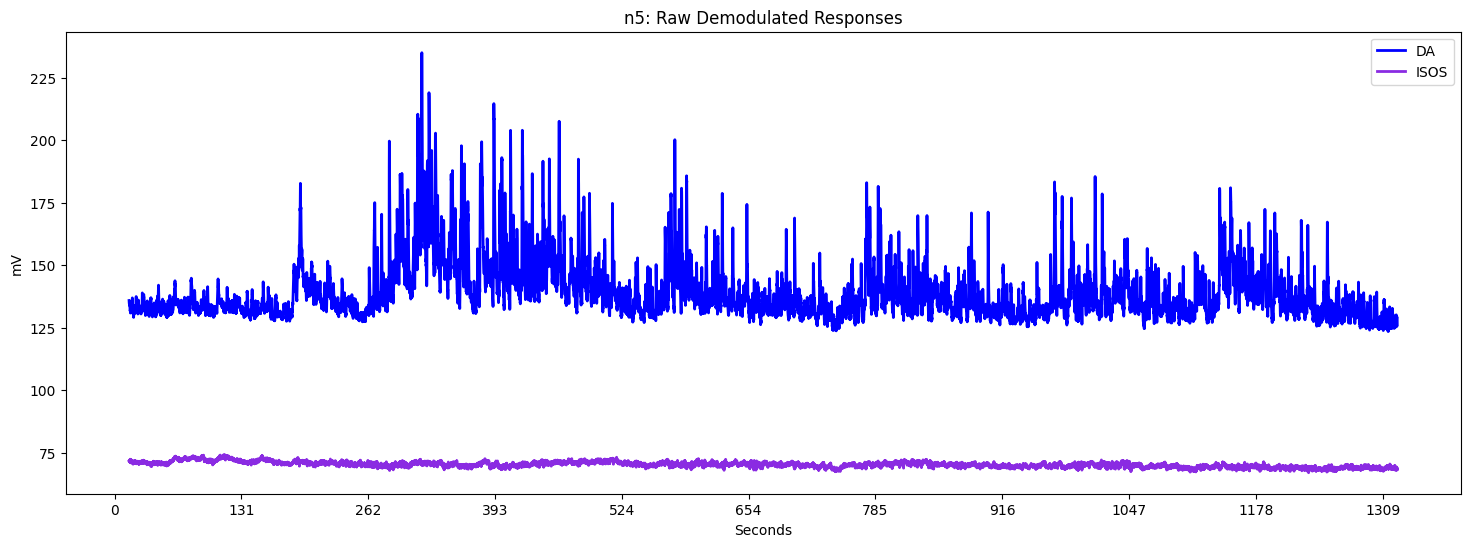

In [4]:
# Remove initial LED artifact
tdt_data_obj.remove_initial_LED_artifact(t=15)

# tdt_data_obj.smooth_signal()
tdt_data_obj.verify_signal()
# Plot raw trace
tdt_data_obj.plot('raw')

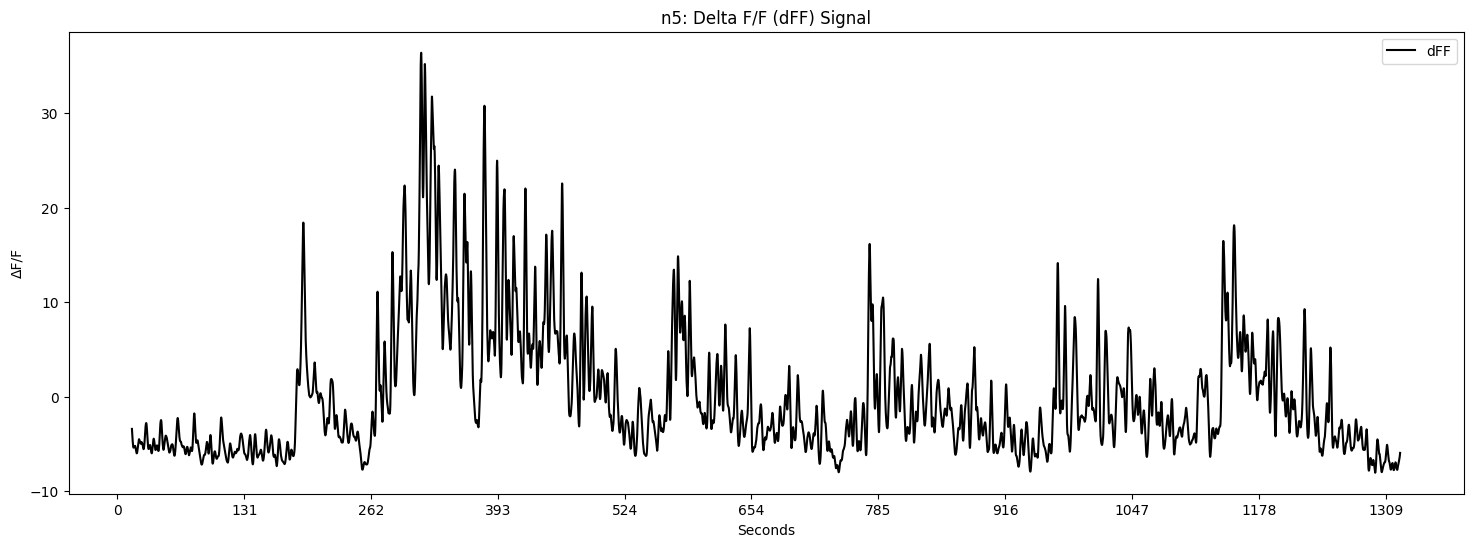

In [5]:
# Downsample the data
tdt_data_obj.downsample_data(N = 20)


# Compute dFF
tdt_data_obj.compute_dff()
tdt_data_obj.plot('dFF')

In [6]:
tdt_data_obj.compute_zscore()

In [7]:
tdt_data_obj.print_behaviors()

No behaviors found.


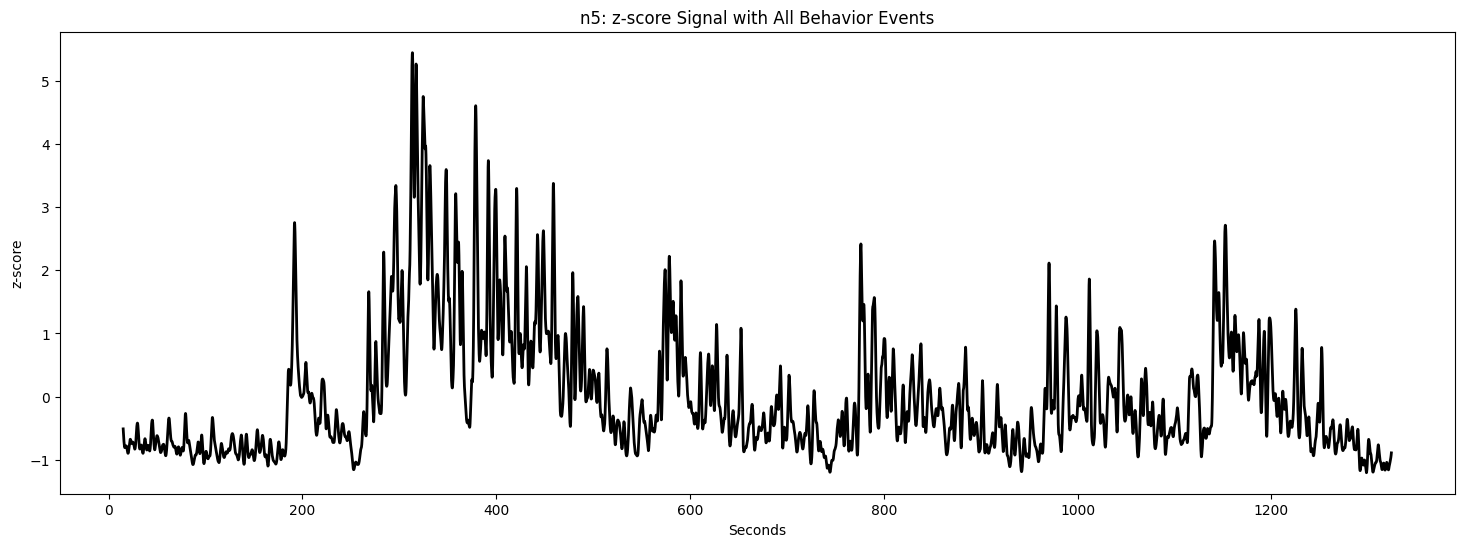

In [8]:
tdt_data_obj.plot_behavior_event(behavior_name='all', plot_type='zscore')

In [9]:
tdt_data_obj.combine_consecutive_behaviors(behavior_name='all', bout_time_threshold=5, min_occurrences=1)

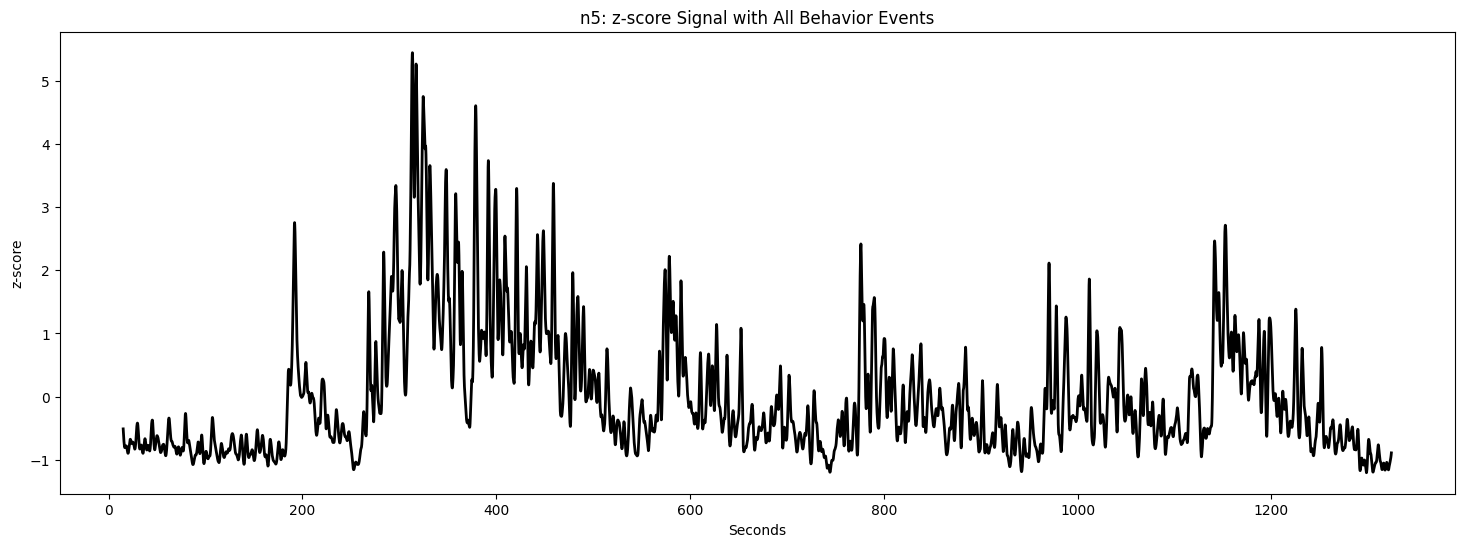

In [10]:
tdt_data_obj.plot_behavior_event(behavior_name='all', plot_type='zscore')

## Mean DA during first of each behavior

In [11]:
tdt_data_obj.extract_intruder_bouts(csv_base_path)

KeyError: 'Start (s)'

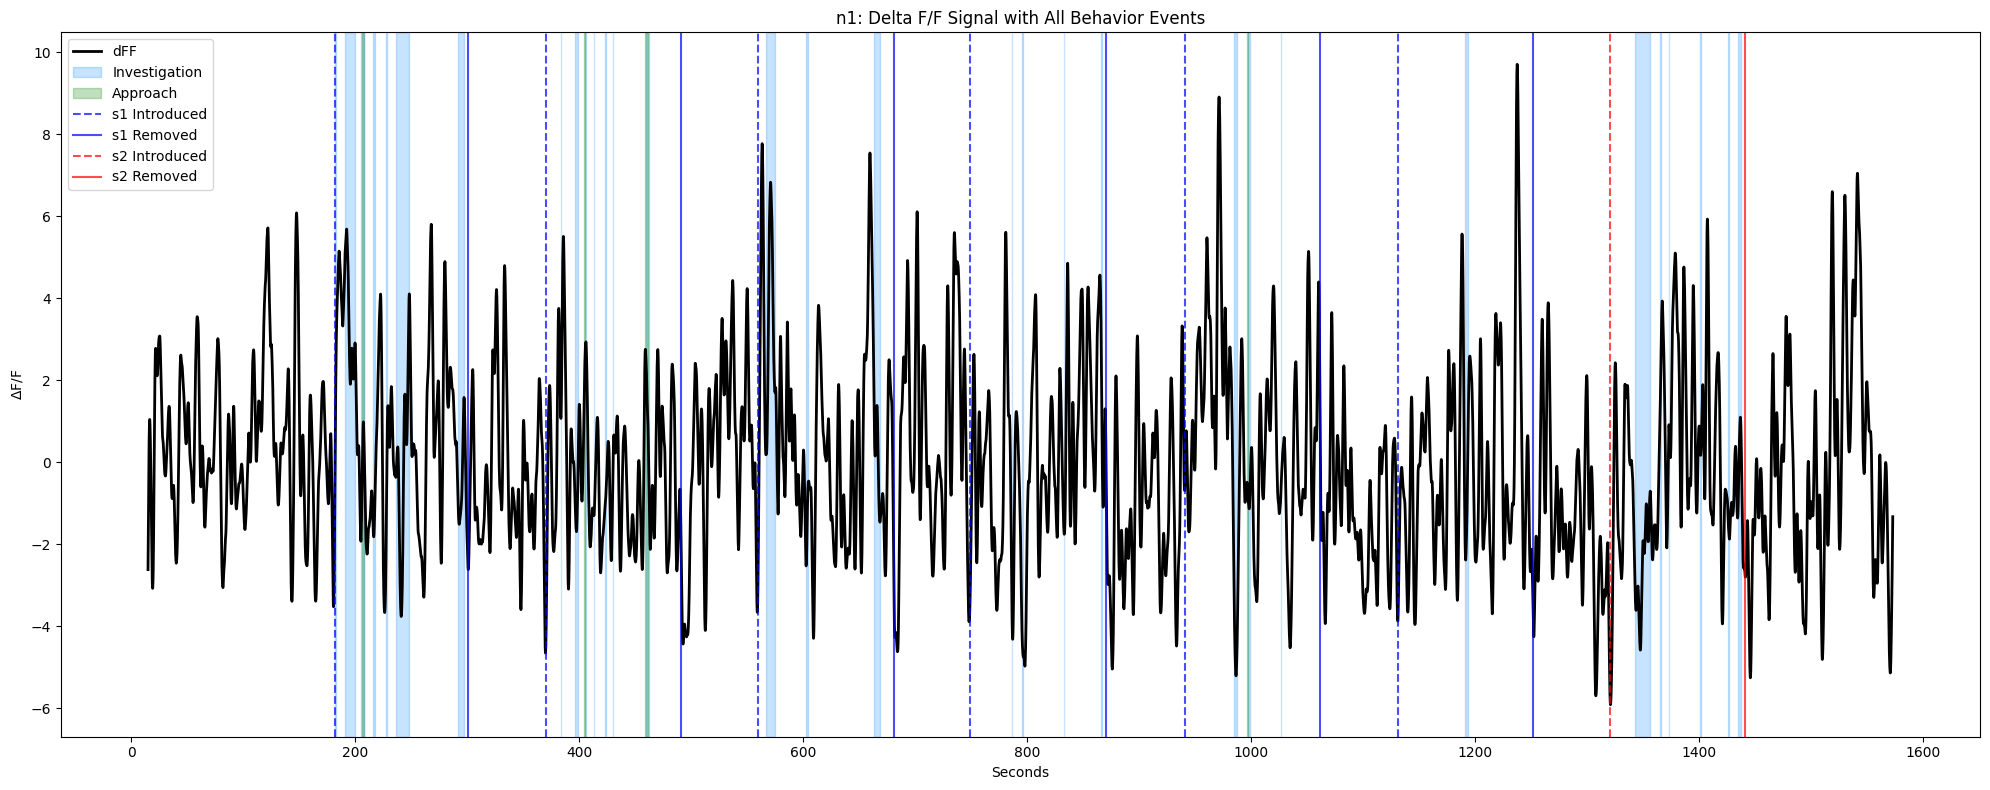

In [24]:
tdt_data_obj.hab_dishab_plot_behavior_event(behavior_name='all')

In [25]:
tdt_data_obj.find_behavior_events_in_bout()
tdt_data_obj.get_first_behavior()
tdt_data_obj.calculate_meta_data()